In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/Social_Network_Ads.csv').values
X = dataset[:,:-1]
y = dataset[:,-1]

In [3]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(X,y,test_size=0.25,random_state=42)

In [4]:
print(xTrain.shape,xTest.shape,yTrain.shape,yTest.shape)

(300, 2) (100, 2) (300,) (100,)


In [5]:
# X scaling
from sklearn.preprocessing import StandardScaler
# data를 평균이 0이고 분산(표준편차)이 1인 분포로 변경
sc=StandardScaler()
sc.fit(xTrain) # 분포 변환에 필요한 정보 수집
xTrainSc=sc.transform(xTrain)

In [6]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()
# default: linear regression → ridge regression
logReg.fit(xTrain,yTrain)

logRegSc=LogisticRegression()
logRegSc.fit(xTrainSc,yTrain)

LogisticRegression()

In [7]:
yPred=logReg.predict(xTest)
# logRegSc는 scaling한 x로 학습했으므로,
# predict할 때도, xTest를 scaling해야 함
yPredSc=logRegSc.predict(sc.transform(xTest))

In [8]:
from sklearn.metrics import accuracy_score
logRegAcc=accuracy_score(yTest,yPred)
logRegAccSc=accuracy_score(yTest,yPredSc)
print(logRegAcc, logRegAccSc)
# sklearn의 Logistic regression은 ridge regression 베이스이므로
# x에 scaling을 적용해야 좋은 결과를 얻을 수 있음

0.63 0.86


* LogisticRegression의 attribute

In [9]:
# weight (가중치, w1 ~ wn)
w = logRegSc.coef_ 
# bias (편향, w0)
b = logRegSc.intercept_

print(w)
print(b)

[[1.92319087 1.07841869]]
[-1.03149947]


In [10]:
print(sc.transform(xTest).shape, w.shape)

(100, 2) (1, 2)


In [11]:
# w와 b를 통한 prediction
# w1*x1 + w2*x2 + w0
# w1*x1 + w2*x2 = w와x의 내적
# w의 열과 x의 행이 동일하거나, x의 열과 w의 행이 동일해야 함
xTestSc=sc.transform(xTest)
# xTestSc와 w의 내적을 구하기 위해서는 w를 transpose해야 함
tmp=xTestSc.dot(w.T)+b
# 위의 tmp를 logistic function에 대입
yPredAttProb=1/(1+np.exp(-tmp))
# yPredAttProb: coef_와 intercept_를 이용한 결과
print(yPredAttProb)

[[0.27328991]
 [0.97224512]
 [0.02449956]
 [0.84951935]
 [0.01799556]
 [0.06067894]
 [0.86858473]
 [0.09390361]
 [0.39137959]
 [0.4064092 ]
 [0.1543615 ]
 [0.67304532]
 [0.01095927]
 [0.00285265]
 [0.12433349]
 [0.41429905]
 [0.65906847]
 [0.65928158]
 [0.15843413]
 [0.89163889]
 [0.00471192]
 [0.08616531]
 [0.31915873]
 [0.96000468]
 [0.00208373]
 [0.499442  ]
 [0.52340687]
 [0.15432023]
 [0.98140971]
 [0.00221894]
 [0.40625666]
 [0.01030344]
 [0.72645142]
 [0.07032316]
 [0.6379639 ]
 [0.20008269]
 [0.16272274]
 [0.2433798 ]
 [0.01095413]
 [0.00802787]
 [0.43689545]
 [0.01641214]
 [0.00486504]
 [0.29898293]
 [0.00644744]
 [0.91133142]
 [0.04927001]
 [0.09387671]
 [0.49956057]
 [0.07026117]
 [0.04115862]
 [0.90326783]
 [0.1901162 ]
 [0.04241995]
 [0.29931439]
 [0.01361775]
 [0.98502186]
 [0.15047588]
 [0.10223007]
 [0.10815909]
 [0.26723322]
 [0.12424746]
 [0.90864775]
 [0.08869111]
 [0.03872519]
 [0.28019613]
 [0.60077925]
 [0.95495774]
 [0.24335068]
 [0.36206399]
 [0.97831724]
 [0.01

In [12]:
# yPredAttProb와 sklearn의 predict결과 비교
yPredSc=logRegSc.predict(xTestSc)
print(yPredSc)
# yPredAttProb는 확률 (class가 1일 확률, logistic 함수의 연산 결과)
# sklearn prediction의 결과는 확률이 0.5보다 클 경우, 1, 작을 경우 0으로 판단한 결과

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0]


In [13]:
yPredScProb=logRegSc.predict_proba(xTestSc)
# print(yPredScProb[:,1:])
# index=0인 열은 class=0일 확률
# index=1인 열은 class=1일 확률
# logistic 함수의 결과 yPredAttProb는 class=1일 확률 

In [14]:
# yPredScProb[:,1:](sklearn)와 yPredAttProb 비교

# 둘을 좌우로 연결하여 비교
print(np.concatenate((yPredScProb[:,1:],yPredAttProb),axis=1))

[[0.27328991 0.27328991]
 [0.97224512 0.97224512]
 [0.02449956 0.02449956]
 [0.84951935 0.84951935]
 [0.01799556 0.01799556]
 [0.06067894 0.06067894]
 [0.86858473 0.86858473]
 [0.09390361 0.09390361]
 [0.39137959 0.39137959]
 [0.4064092  0.4064092 ]
 [0.1543615  0.1543615 ]
 [0.67304532 0.67304532]
 [0.01095927 0.01095927]
 [0.00285265 0.00285265]
 [0.12433349 0.12433349]
 [0.41429905 0.41429905]
 [0.65906847 0.65906847]
 [0.65928158 0.65928158]
 [0.15843413 0.15843413]
 [0.89163889 0.89163889]
 [0.00471192 0.00471192]
 [0.08616531 0.08616531]
 [0.31915873 0.31915873]
 [0.96000468 0.96000468]
 [0.00208373 0.00208373]
 [0.499442   0.499442  ]
 [0.52340687 0.52340687]
 [0.15432023 0.15432023]
 [0.98140971 0.98140971]
 [0.00221894 0.00221894]
 [0.40625666 0.40625666]
 [0.01030344 0.01030344]
 [0.72645142 0.72645142]
 [0.07032316 0.07032316]
 [0.6379639  0.6379639 ]
 [0.20008269 0.20008269]
 [0.16272274 0.16272274]
 [0.2433798  0.2433798 ]
 [0.01095413 0.01095413]
 [0.00802787 0.00802787]


In [15]:
# 둘의 차를 계산한 뒤, 전체의 합
# yPredScProb[:,1:]-yPredAttProb은 각 행에 대한 차이를 반환
print((yPredScProb[:,1:]-yPredAttProb).sum())

0.0


In [16]:
# yPredAttProb를 0과 1의 조합으로 변경
# → 0.5보다 크면 1, 작으면 0으로 변경
yPredAtt = np.where(yPredAttProb>0.5,1,0)
# np.where(조건식,a,b): 조건식이 참이면 a, 거짓이면 

In [17]:
attAcc=accuracy_score(yTest,yPredAtt)
print(attAcc)

0.86


#### ※ StandardScaler 정보

In [18]:
# standard scaler
# scalingX = (X - X평균) / X표준편차
xMean=sc.mean_
xStd=sc.scale_

# 검증
sample=[[20,30000]]
# 1.StandardScaler transform 사용
scSample=sc.transform(sample)
# 2. scaling 식 이용
scSampleInfo=(sample-xMean)/xStd

print(scSample,scSampleInfo)

[[-1.74071081 -1.16551962]] [[-1.74071081 -1.16551962]]


## 정확도 측정

In [20]:
from sklearn.metrics import accuracy_score
logRegAcc=accuracy_score(yTest,yPred)
logRegAccSc=accuracy_score(yTest,yPredSc)
print(logRegAcc, logRegAccSc)

0.63 0.86


In [26]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yTest, yPredSc)
print(cm)

[[61  2]
 [12 25]]


In [31]:
# precision = TP / (TP + FP)
# recall = TP / (TP+FN)

logRegAccSc=accuracy_score(yTest,yPredSc)
logRegErrSc = 1-logRegAccSc
logRegPreSc = cm[1,1]/(cm[1,1]+cm[0,1])
logRegRecSc = cm[1,1]/(cm[1,1]+cm[1,0])

print('accuracy:',logRegAccSc*100)
print('error rate:',logRegErrSc*100)
print('precision:',logRegPreSc*100)
print('recall:',logRegRecSc*100)

accuracy: 86.0
error rate: 14.000000000000002
precision: 92.5925925925926
recall: 67.56756756756756


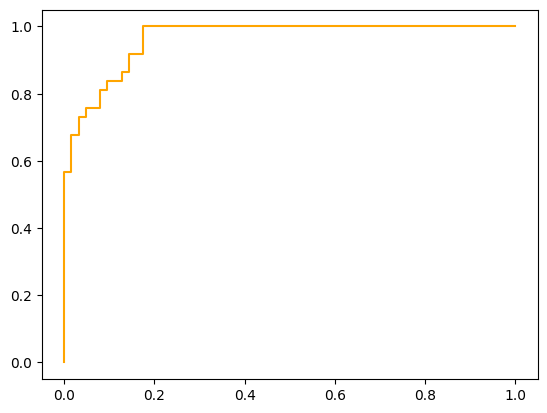

In [60]:
from sklearn.metrics import roc_curve
yPredProb = logRegSc.predict_proba(xTestSc)
# 2열 반환
# yPredProb[:,0] = 0: class 0일 확률
# index = 1: class 1일 확률
# threshold 간격 = 0.5

threshold = 0.5
yPredProbTH = np.where(yPredProb[:,1]>threshold,1,0)

# (과제) ROC curve를 그리시오.
# 가로축 : FPR = FP / (FP + TN)
# 세로축 : TPR = TP / (TP + FN)

# FPR, TPR, threshold = roc_curve(target, class=1일 확률)
FPR, TPR, threshold = roc_curve(yTest,yPredProb[:,1])
plt.plot(FPR, TPR,color='orange')

[1.99245479 0.99245479 0.67304532 0.65928158 0.60077925 0.52340687
 0.499442   0.47622889 0.43689545 0.4064092  0.39913596 0.39883267
 0.39864316 0.37651609 0.36940803 0.36206399 0.31238682 0.29931439
 0.28019613 0.00208373]


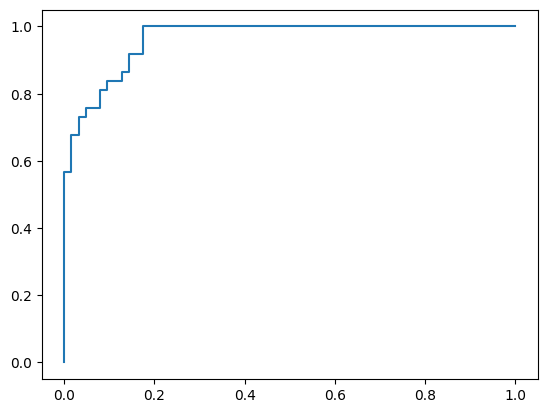

In [46]:
from sklearn.metrics import roc_curve
# FPR, TPR, threshold = roc_curve(target, class=1일 확률)
FPR, TPR, threshold = roc_curve(yTest,yPredProb[:,1])
plt.plot(FPR, TPR)
print(threshold)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


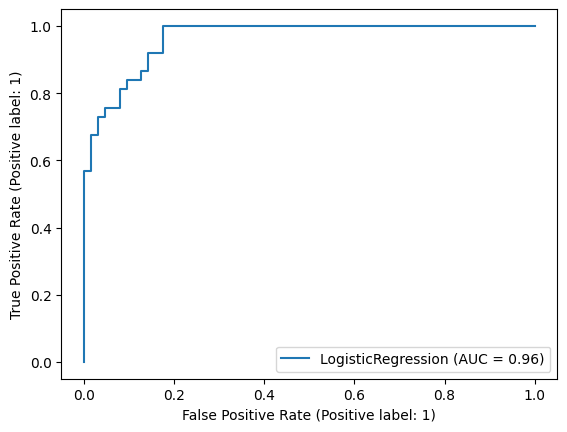

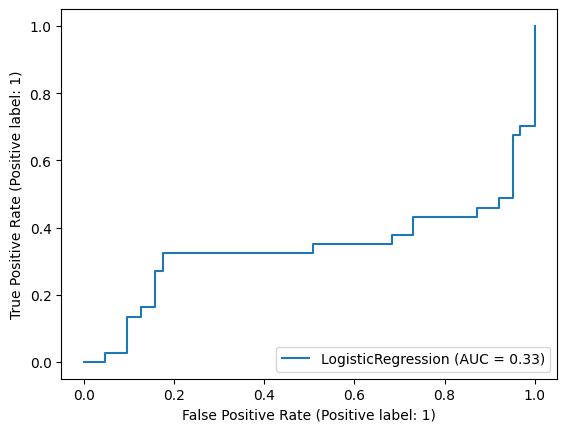

In [48]:
# ROC Curve를 그리는 가장 간단한 방법

from sklearn.metrics import plot_roc_curve
# plot_roc_curve(model, xTest, yTest)
plot_roc_curve(logRegSc, xTestSc, yTest)
plot_roc_curve(logReg, xTestSc, yTest)